In [1]:
import pandas as pd
import numpy as np

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
app_train = pd.read_csv('data/application_train.csv')
POS_CASH_balance = pd.read_csv('data/POS_CASH_balance.csv')
bureau_balance = pd.read_csv('data/bureau_balance.csv')
previous_application = pd.read_csv('data/previous_application.csv')
installments_payments = pd.read_csv('data/installments_payments.csv')
credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
bureau = pd.read_csv('data/bureau.csv')
app_test = pd.read_csv('data/application_test.csv')

In [4]:
# size of each table
print('Size of app_train data', app_train.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of bureau data', bureau.shape)

Size of app_train data (307511, 122)
Size of POS_CASH_balance data (10001358, 8)
Size of bureau_balance data (27299925, 3)
Size of previous_application data (1670214, 37)
Size of installments_payments data (13605401, 8)
Size of credit_card_balance data (3840312, 23)
Size of bureau data (1716428, 17)


__summary for application_train.csv__

In [5]:
nunique = dict(zip(app_train.columns, [app_train[col].nunique() for col in app_train.columns]))
summary = pd.DataFrame({'number_nan':app_train.isna().sum(), # [df.isna().sum()][0], here [0] coerces list into series with 12 separate values
                        'number_distinct':[app_train[col].nunique() for col in app_train.columns],
                       'distinct vals': [app_train[col].unique() for col in app_train.columns]})
summary

,number_nan,number_distinct,distinct vals
SK_ID_CURR,0,307511,"[100002, 100003, 100004, 100006, 100007, 10000..."
TARGET,0,2,"[1, 0]"
NAME_CONTRACT_TYPE,0,2,"[Cash loans, Revolving loans]"
CODE_GENDER,0,3,"[M, F, XNA]"
FLAG_OWN_CAR,0,2,"[N, Y]"
FLAG_OWN_REALTY,0,2,"[Y, N]"
CNT_CHILDREN,0,15,"[0, 1, 2, 3, 4, 7, 5, 6, 8, 9, 11, 12, 10, 19,..."
AMT_INCOME_TOTAL,0,2548,"[202500.0, 270000.0, 67500.0, 135000.0, 121500..."
AMT_CREDIT,0,5603,"[406597.5, 1293502.5, 135000.0, 312682.5, 5130..."
AMT_ANNUITY,12,13672,"[24700.5, 35698.5, 6750.0, 29686.5, 21865.5, 2..."


In [15]:
app_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [6]:
# data types
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [7]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

__missing data__

In [16]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [17]:
missing_data(app_train).head(10)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [18]:
missing_data(app_test).head(10)

,Total,Percent
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
NONLIVINGAPARTMENTS_AVG,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302


# EDA

__distribution of target__

__TARGET__ value 0 means loan is repayed, value 1 means loan is not repayed.

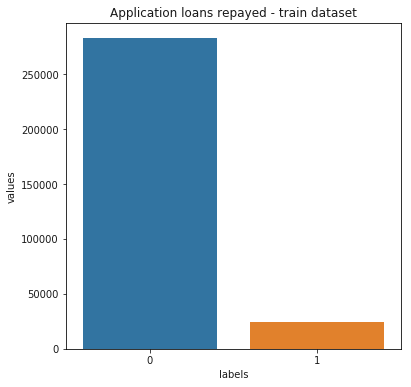

In [21]:
temp = app_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()


__Loan types__<br>
Let's see the type of the loans taken and also, on a separate plot, the percent of the loans (by type of the loan) with TARGET value 1 (not returned loan).

In [24]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [25]:
def plot_distribution(var):
    
    i = 0
    t1 = app_train.loc[app_train['TARGET'] != 0]
    t0 = app_train.loc[app_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

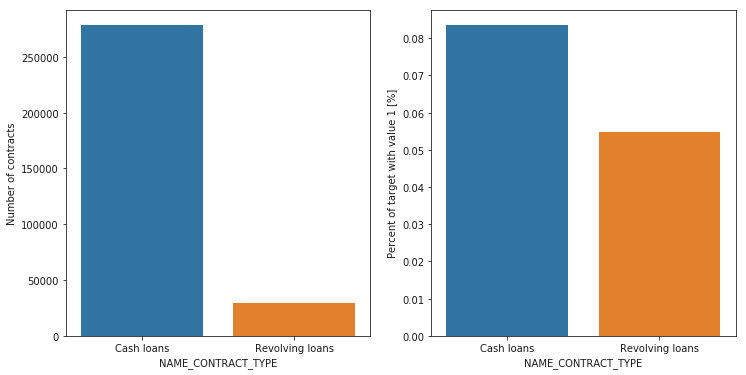

In [26]:
plot_stats('NAME_CONTRACT_TYPE')

Contract type Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

__Client gender__<br>
Let's see the gender of the clients and also, on a separate plot, the percent of the loans (by client gender) with TARGET value 1 (not returned loan).

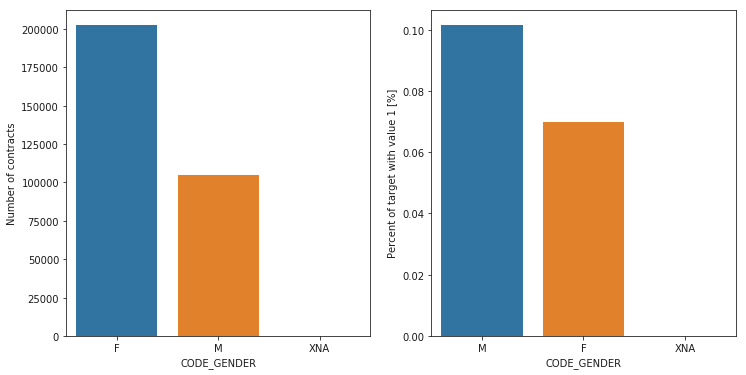

In [27]:
plot_stats('CODE_GENDER')

The number of female clients is almost double the number of male clients. Looking to the percent of defaulted credits, males have a higher chance of not returning their loans (~10%), comparing with women (~7%).

__Flag own car and flag own real estate__<br>
Let's inspect the flags that tell us if a client owns a car or real estate and, on separate plots, the percent of the loans value of these flags) with TARGET value 1 (not returned loan).

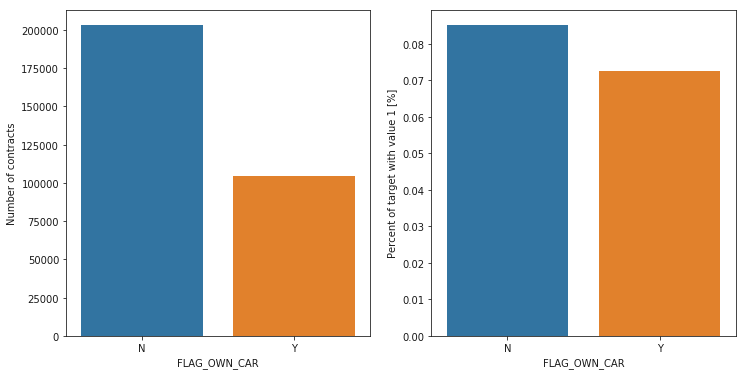

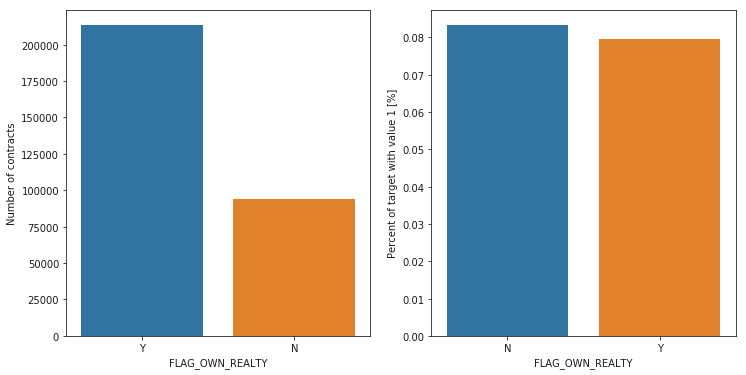

In [28]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

The clients that owns a car are almost a half of the ones that doesn't own one. The clients that owns a car are less likely to not repay a car that the ones that own. Both categories have not-repayment rates around 8%.<br>

The clients that owns real estate are more than double of the ones that doesn't own. Both categories (owning real estate or not owning) have not-repayment rates less than 8%.

__Family status of client__

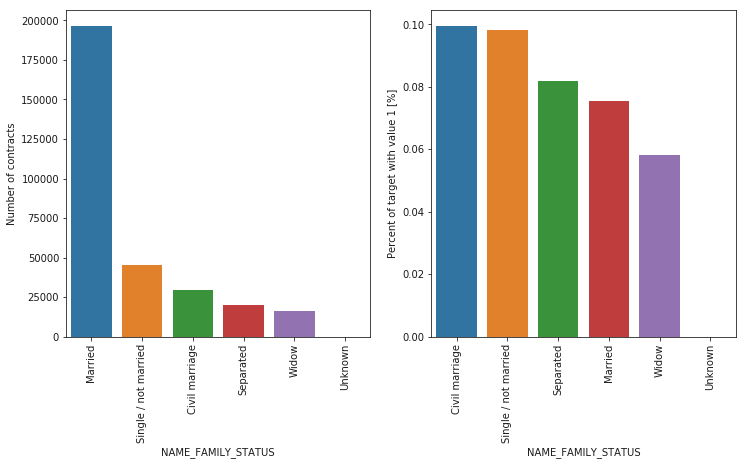

In [29]:
plot_stats('NAME_FAMILY_STATUS',True, True)

Most of clients are married, followed by Single/not married and civil marriage.<br>

In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).

__Number of children__<br>
Let's see what is the distribution of the number of children of the clients.

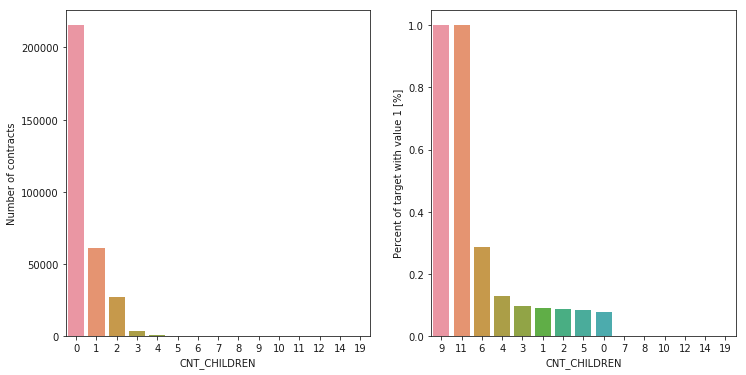

In [30]:
plot_stats('CNT_CHILDREN')

Most of the clients taking a loan have no children. The number of loans associated with the clients with one children are 4 times smaller, the number of loans associated with the clients with two children are 8 times smaller; clients with 3, 4 or more children are much more rare.

As for repayment, clients with no children, 1, 2, 3, and 5 children have percents of no repayment around the average (10%). The clients with 4 and 6 children are above average in terms of percent of not paid back loans (over 25% for families with 6 children).

As for clients with 9 or 11 children, the percent of loans not repaid is 100%.

__Number of family members of client__

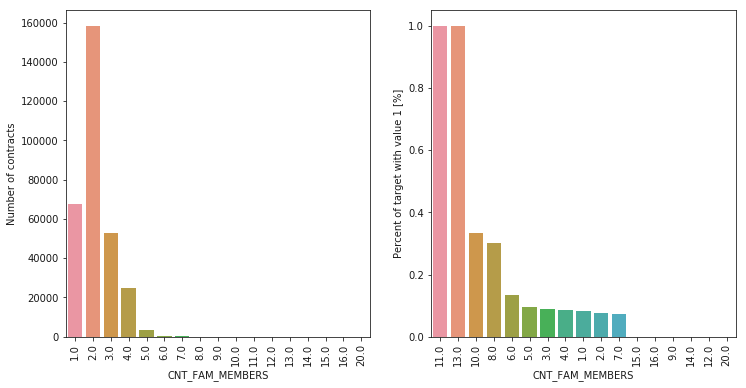

In [31]:
plot_stats('CNT_FAM_MEMBERS',True)

Clients with family members of 2 are most numerous, followed by 1 (single persons), 3 (families with one child) and 4.

Clients with family size of 11 and 13 have 100% not repayment rate. Other families with 10 or 8 members have percents of not repayment of loans over 30%. Families with 6 or less members have repayment rates close to the 10% average.

__Income type of client__<br>
Let's investigate the numbers of clients with different income type. As well, let's see the percent of not returned loans per income type of applicants.

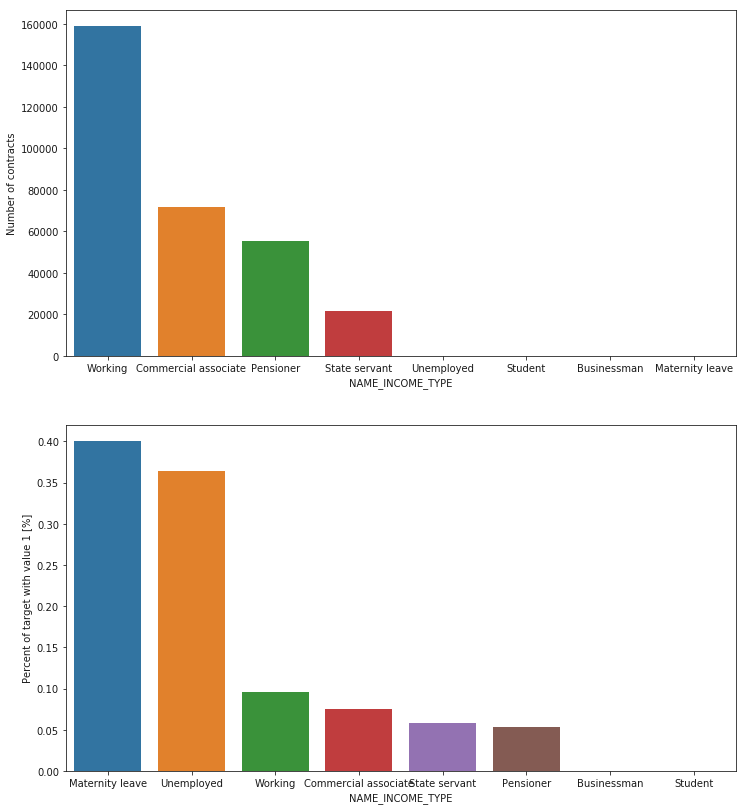

In [32]:
plot_stats('NAME_INCOME_TYPE',False,False)

Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant.

The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.

__Ocupation of client__

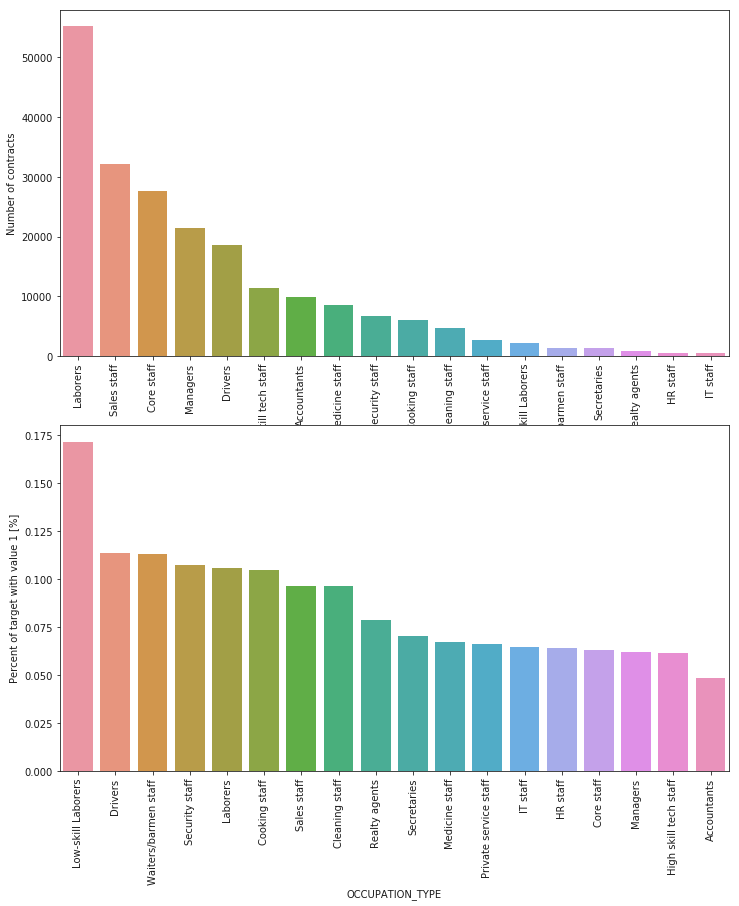

In [33]:
plot_stats('OCCUPATION_TYPE',True, False)

Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.

The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

__Organization type__

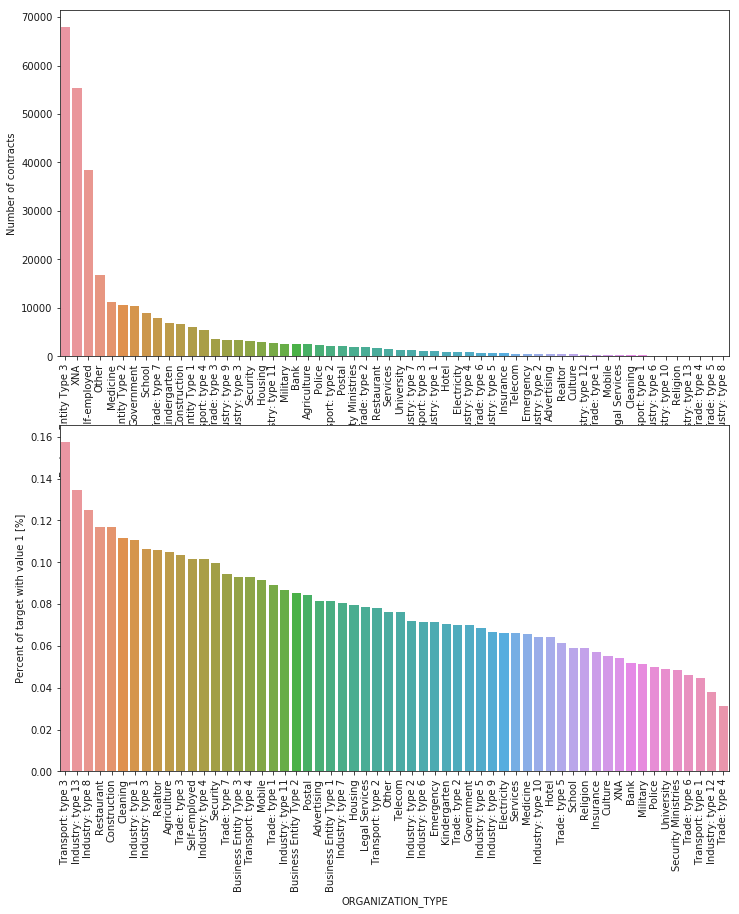

In [34]:
plot_stats('ORGANIZATION_TYPE',True, False)

Oraganizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).

__Education type of the client__

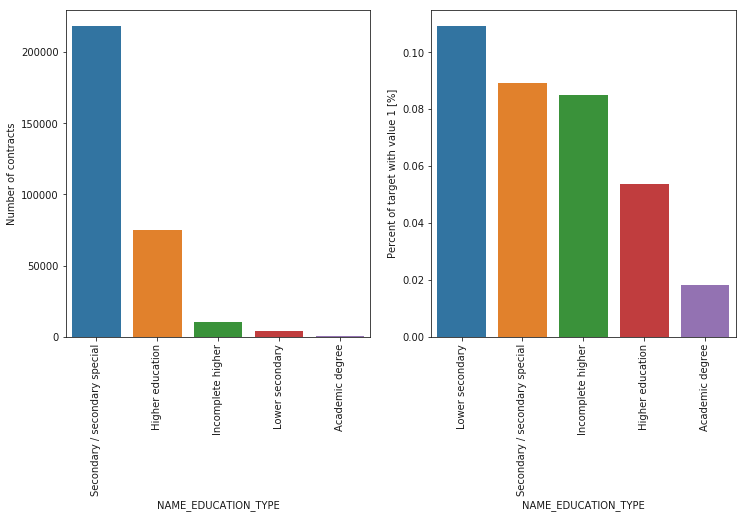

In [35]:
plot_stats('NAME_EDUCATION_TYPE',True)

Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.

The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% not-repayment rate.

__Type of the housing of client__

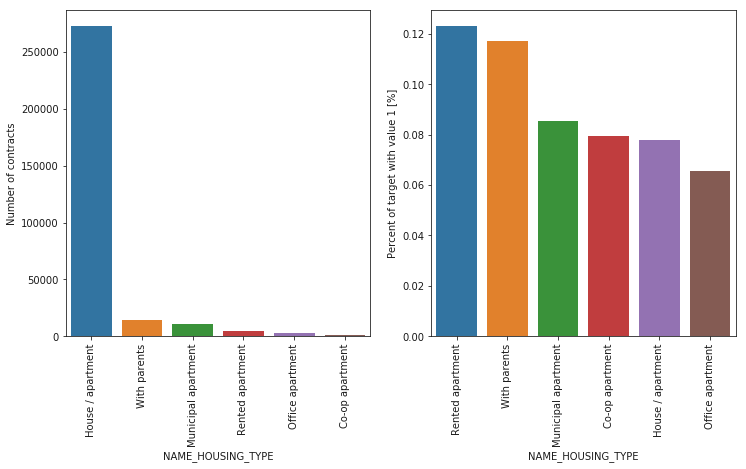

In [36]:
plot_stats('NAME_HOUSING_TYPE',True)

Over 250,000 applicants for credits registered their housing as House/apartment. Following categories have a very small number of clients (With parents, Municipal appartment).

From these categories, Rented apartment and With parents have higher than 10% not-repayment rate.

__Total income distribution__<br>
Let's plot the distribution of total income for the clients.

In [37]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(app_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()   

In [38]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = app_train.loc[app_train['TARGET'] != 0]
    t0 = app_train.loc[app_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


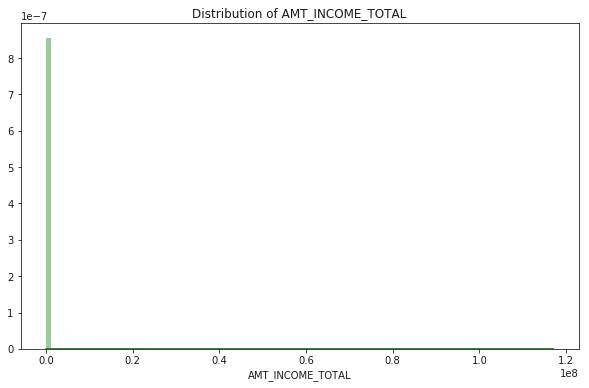

In [39]:
plot_distribution('AMT_INCOME_TOTAL','green')

__Credit distribution__


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


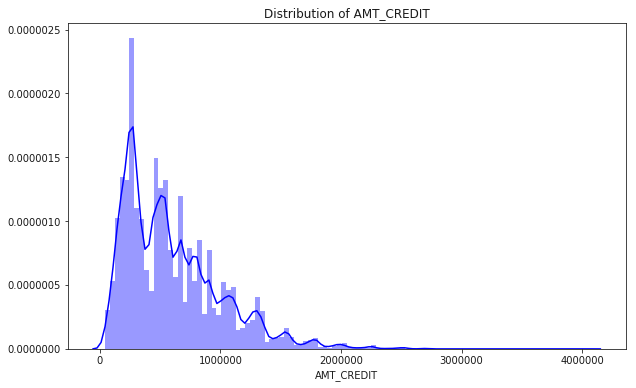

In [40]:
plot_distribution('AMT_CREDIT','blue')

__Annuity distribution__


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


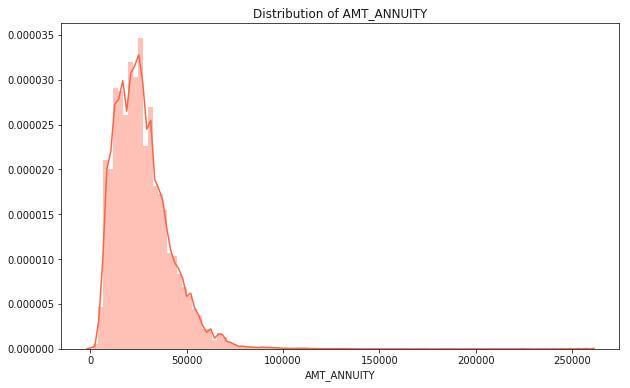

In [42]:
plot_distribution('AMT_ANNUITY','tomato')

__Goods price__

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


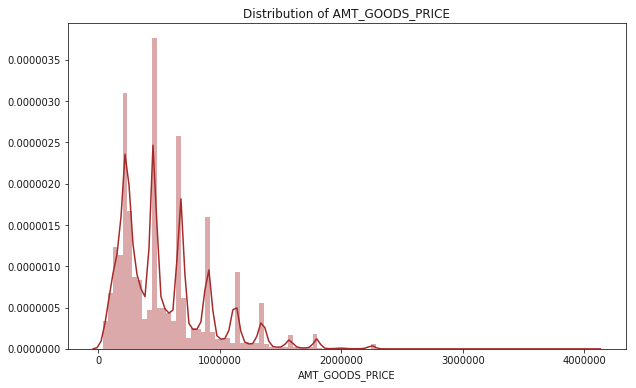

In [43]:
plot_distribution('AMT_GOODS_PRICE','brown')

__Days from birth distribution__

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


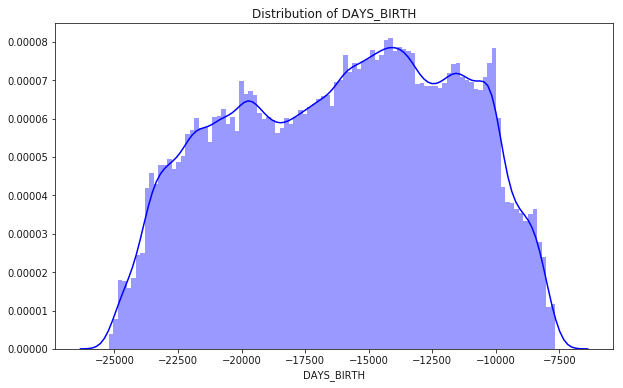

In [44]:
plot_distribution('DAYS_BIRTH','blue')

__Days employed distribution__

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


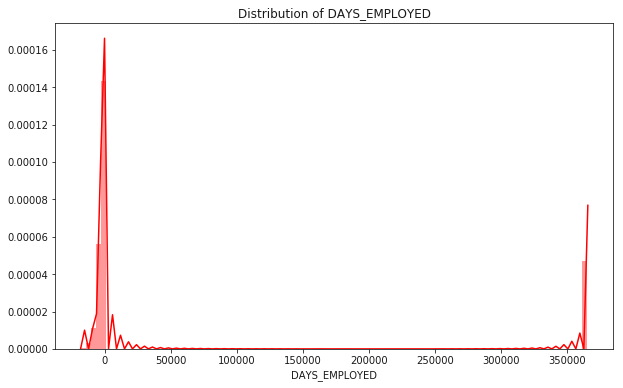

In [45]:
plot_distribution('DAYS_EMPLOYED','red')

The negative values means Days since employed and most probably these negative values means Unemployed. It is not clear what will be the meaning of the very large numbers at the far end (it is not realistic such a large set of people employed more than 100 years).

__Days of registration distribution__

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


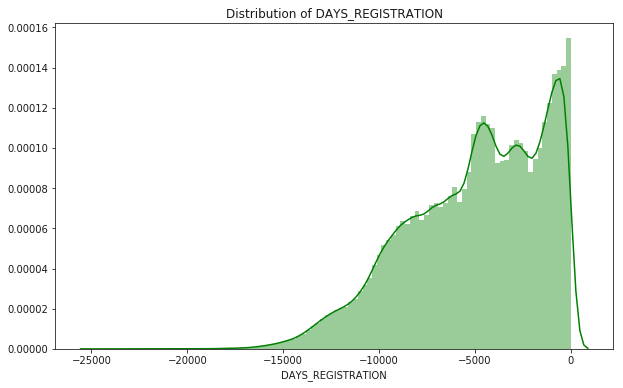

In [46]:
plot_distribution('DAYS_REGISTRATION','green')

__Days ID publish distribution__

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


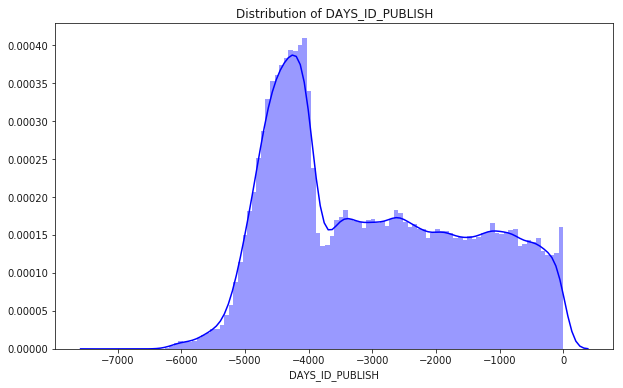

In [47]:
plot_distribution('DAYS_ID_PUBLISH','blue')

__Comparison of interval values with TARGET = 1 and TARGET = 0__

Let's compare the distribution of interval values ploted above for values of TARGET = 1 and TARGET = 0

<Figure size 432x288 with 0 Axes>

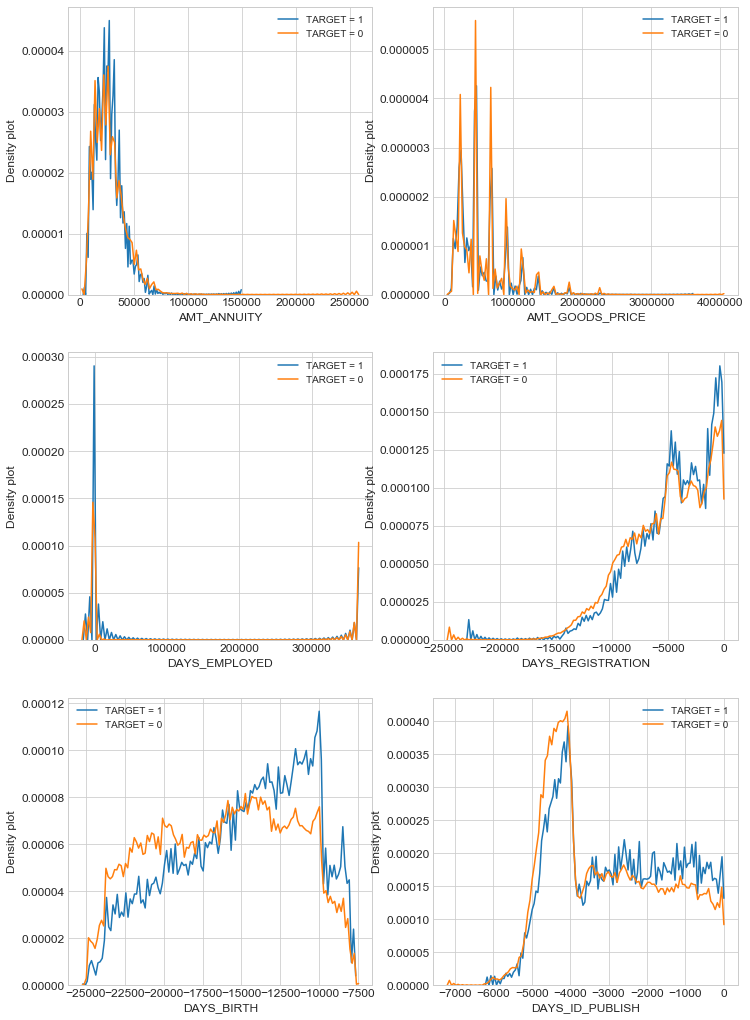

In [48]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(var,nrow=3)

__Region registered not live region and not work region__

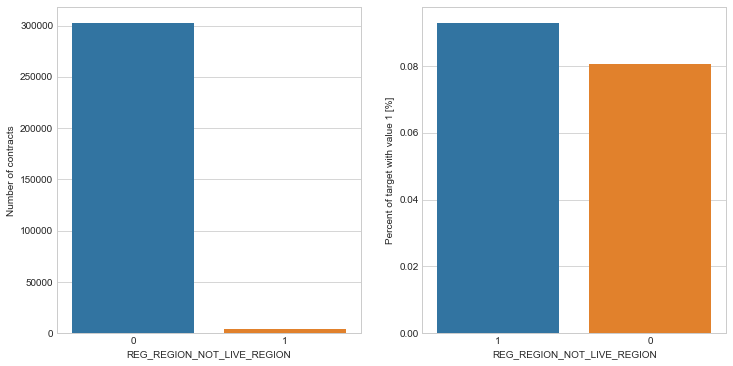

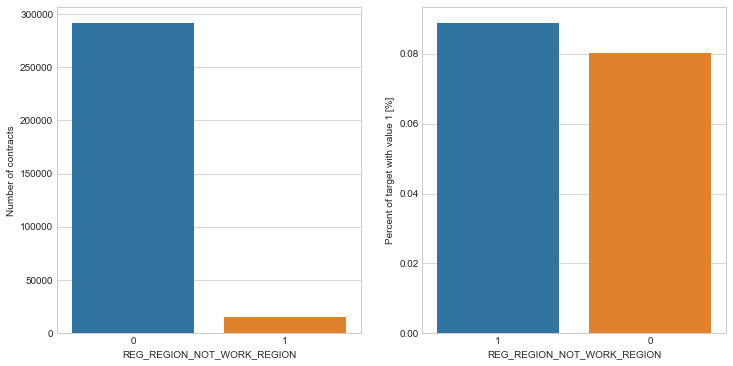

In [49]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

Very few people are registered in not live or not work region. Generally, the rate of not return is slightly larger for these cases than in the rest (slightly above 8% compared with approx. 8%)

__City registered not live city and not work city__

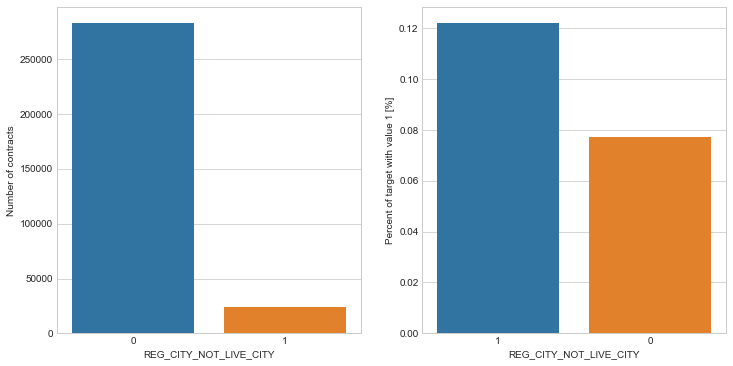

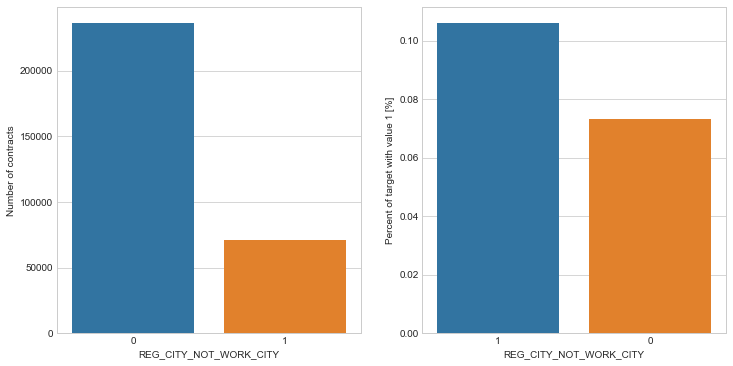

In [50]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

Generally, much more people register in the city they live or work (a larger number register differently in the working city than living city).

The ones that register in different city than the working or living city are more frequently not-repaying the loans than the ones that register same city (work 11% or live 12%).

__Identify Correlated Variables__

In [9]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = app_train.corr().abs()
corr_matrix.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.002108,0.001129,0.001820,0.000343,0.000433,0.000232,0.000849,0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,0.002672,0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,0.002108,1.000000,0.019187,0.003982,0.030369,0.012817,0.039645,0.037227,0.078239,0.044932,...,0.007952,0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,0.012462,0.002022,0.019930
CNT_CHILDREN,0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,0.001827,0.025573,0.330938,0.239818,...,0.004031,0.000864,0.000988,0.002450,0.000410,0.000366,0.002436,0.010808,0.007836,0.041550
AMT_INCOME_TOTAL,0.001820,0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,0.064223,...,0.003130,0.002408,0.000242,0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,0.000343,0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,0.055436,0.066838,...,0.034329,0.021082,0.031023,0.016148,0.003906,0.004238,0.001275,0.054451,0.015925,0.048448


In [10]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,NaN,0.002108,0.001129,0.001820,0.000343,0.000433,0.000232,0.000849,0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,0.002672,0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,NaN,NaN,0.019187,0.003982,0.030369,0.012817,0.039645,0.037227,0.078239,0.044932,...,0.007952,0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,0.012462,0.002022,0.019930
CNT_CHILDREN,NaN,NaN,NaN,0.012882,0.002145,0.021374,0.001827,0.025573,0.330938,0.239818,...,0.004031,0.000864,0.000988,0.002450,0.000410,0.000366,0.002436,0.010808,0.007836,0.041550
AMT_INCOME_TOTAL,NaN,NaN,NaN,NaN,0.156870,0.191657,0.159610,0.074796,0.027261,0.064223,...,0.003130,0.002408,0.000242,0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,NaN,NaN,NaN,NaN,NaN,0.770138,0.986968,0.099738,0.055436,0.066838,...,0.034329,0.021082,0.031023,0.016148,0.003906,0.004238,0.001275,0.054451,0.015925,0.048448
